<a href="https://colab.research.google.com/github/joseCarlosAndrade/dev-jc/blob/main/python/ds/data/IFOOD_DIO_my.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IFOOD DIO - Dev week data science | Bootcamp

Bootcamp de ciencia de dados da plataforma DIO.


In [1]:
"""
Arquivo publico no meu Google Drive para acesso a partir deste ambiente:
https://drive.google.com/file/d/1W3aI76719Kn5Cq-7Bl4MiuV-HpdKcO2E/view?usp=sharing
"""

# Baixar arquivos a partir do google drive para este ambiente
import gdown
import pandas as pd

file_id = '1W3aI76719Kn5Cq-7Bl4MiuV-HpdKcO2E'
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'feedbacks.csv')

Downloading...
From: https://drive.google.com/uc?id=1W3aI76719Kn5Cq-7Bl4MiuV-HpdKcO2E
To: /content/feedbacks.csv
100%|██████████| 176/176 [00:00<00:00, 473kB/s]


'feedbacks.csv'

In [2]:
# Lendo o arquivo baixado
dados = pd.read_csv("/content/feedbacks.csv", delimiter=";")

In [3]:
# Itera por todos os elementos para mostr

for i, j in dados.iterrows():
  print("Indice: ", i, "; Informações - Nota: ", j["nota"], "; Comentario: ", j["comentario"])

Indice:  0 ; Informações - Nota:  1 ; Comentario:  pessimo odiei!
Indice:  1 ; Informações - Nota:  5 ; Comentario:  mediano, ja vi melhores
Indice:  2 ; Informações - Nota:  6 ; Comentario:  entendi conceitos novos, porem nada de especial
Indice:  3 ; Informações - Nota:  2 ; Comentario:  horrivel
Indice:  4 ; Informações - Nota:  7 ; Comentario:  deu pro gasto
Indice:  5 ; Informações - Nota:  4 ; Comentario:  me arrependi
Indice:  6 ; Informações - Nota:  9 ; Comentario:  bom
Indice:  7 ; Informações - Nota:  10 ; Comentario:  filho do dono


In [4]:
# Paradigma funcional com algumas funcionalidades especificas do pandas
def calcular_nps(notas: pd.Series):
  # O primeiro aplica um filtro com apply() que recebe uma lambda function, deixando True os elementos que entram na condiçao
  # Apos, o filtro resultante é somado com sum(). Indexação booleana

  # No segundo, filtra diretamente as notas >= 9, e conta quantas encaixam com count()
  detratores = sum(notas.apply(lambda nota: nota <=6))
  promotores = notas[notas >=9].count()

  # print(notas.apply(lambda nota: nota <=6))
  # print(notas[notas >=9])

  return (promotores - detratores) / len(notas)*100

notas = dados["nota"]
nps = calcular_nps(notas)

print(nps)

-37.5


In [5]:
# Paradigma de orientação à objetos

class Feedback:
  def __init__(self, nota, comentario):
    self.nota = nota
    self.comentario =comentario

class AnalisadorFeedback:
  def __init__(self, feedbacks):
    self.feedbacks = feedbacks

  def calcular_nps(self):
    # A lista por dentro cria uma array de 1 para cada condiçao aceita. Apos, sum() soma essa quantidade de 1
    detratores = sum([1 for feedback in self.feedbacks if feedback.nota <= 6])
    promotores = sum([1 for feedback in self.feedbacks if feedback.nota >= 9])

    nps = (promotores - detratores) / len(self.feedbacks)*100
    return nps

## DUAS OPÇOES PARA GERAR LISTA DE FEEDBACKS
# List comprehension - inicializando uma lista de objetos Feedbacks
feedbacks = [ Feedback(linha["nota"], linha["comentario"]) for indice, linha in dados.iterrows()]

# Filtro com apply e lambda function
# axis = 1 -> eixo das linhas, e nao das colunas do dataframe
feedbacks = dados.apply(lambda linha: Feedback(linha["nota"], linha["comentario"]), axis=1)

analisador = AnalisadorFeedback(feedbacks)
nps = analisador.calcular_nps()
print(nps)

-37.5


# Plotando gráficos com os dados obtidos



In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Definindo constantes para avaliaçao dos dodos
NPS_ZONAS = ["Critico", "Aperfeiçoamento", "Qualidade", "Excelencia"]
NPS_VALORES = [-100, 0, 50, 75, 100]
NPS_CORES = ['red', 'orange', 'blue', 'green']

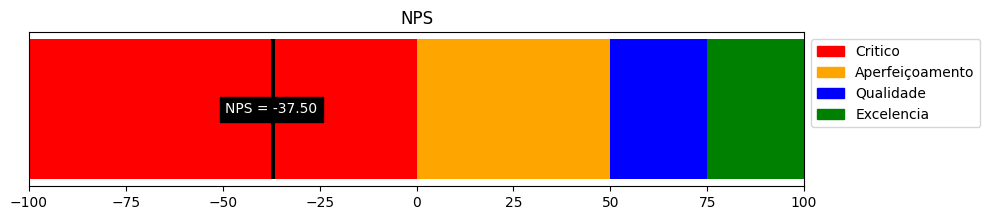

In [12]:
from matplotlib import colors
# Criando gráficos

def criar_grafico_nps(nps : float):
  fig, ax = plt.subplots(figsize=(10,2))

  for i, zona in enumerate(NPS_ZONAS):
    ax.barh([0], width = NPS_VALORES[i+1]-NPS_VALORES[i], left=NPS_VALORES[i], color=NPS_CORES[i])

  ax.barh(0, width=1, left=nps,color='black')

  # Tira a escala em y
  ax.set_yticks([])

  # Seta limite para o eixo x de -100 a 100
  ax.set_xlim(-100,100)

  # Marcaçoes em x somente para os valores usados
  #ax.set_xticks(NPS_VALORES)

  plt.text(nps, 0,f'NPS = {nps:.2f}', ha='center', va='center', color='white', bbox=dict(facecolor='black'))

  # Adicionar legendas usando mpatches
  patches = [mpatches.Patch(color=NPS_CORES[i], label=NPS_ZONAS[i]) for i in range(len(NPS_ZONAS))]
  plt.legend(handles=patches, bbox_to_anchor=(1,1))

  plt.title("NPS")

  plt.show()

criar_grafico_nps(nps)